<hr>
<center><h1>Bayesian Inference Cases</h1></center>
<hr>

<center><h3> created by : Liang Zhouji</h3></center>
<center>Aachen Institute for Advanced Study in Computational Engineering Science (AICES)</center>

In [1]:
#import library
from scipy.stats import norm
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
%matplotlib inline

from Inference import MCMC,VI
from Banana import Banana_dist

### Define the prior by multuvatiate distribution

In [2]:
mu_1= [0.,0.]

cov_1 = [[ 1,  0.],
        [ 0.,  1]]


Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


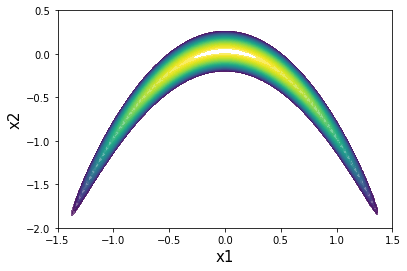

In [3]:
Bana_dist = Banana_dist(mu_1,cov_1)
Bana_dist.draw_post()

# Markov Chain Monte Carlo (MCMC)

In [4]:
MC  = MCMC(Bana_dist)
MC.num_results = 5000
MC.burnin = 100

# Random Walk Metroplis MCMC

<div class="alert alert-info">

The Random Walk Metropolis (RWM) is one of the most common Markov Chain Monte Carlo Algorithms in practical use due to its simple implement and additionaly, it has a particularly pleasant intuition.The Metropolis-Hastings draws sample form any probability distribution where proportional between the function $ f(x) $ and the density of P are known and also the values of $f(x)$ can be calculated. This prerequisite makes the Metropolis-Hasting particulary useful, because calculating the necessary normalization factor is often extremely difficult in practice. Apart from that, the guess-and-check strategy of Random Walk Metropolis is not ideal to use in high dimensional space where there are an exponential number of directions that stay within the typical set and pass the check.

<div>

In [5]:
accepted,rejected = MC.run_chain('RMH')

/Users/darksky_thasya/opt/anaconda3/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/sample.py:333: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


Acceptance rate: 60.6%


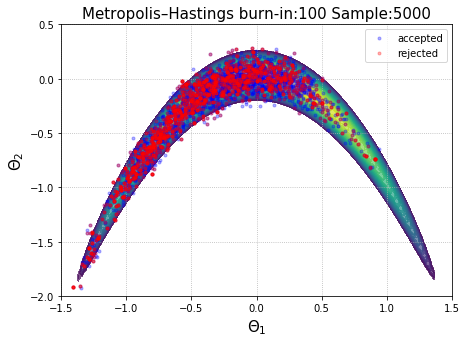

In [6]:
plt.figure(figsize=(7,5))
Bana_dist.draw_post()
x_accepted_RW = accepted[:,0]
y_accepted_RW = accepted[:,1]
x_rejected_RW = rejected[:,0]
y_rejected_RW = rejected[:,1]

plt.xlim(-1.5,1.5)
plt.ylim(-2,0.5)

##TODO: make the title dynamic, burn-in Sample sync as in MCMC
plt.title('Metropolis–Hastings burn-in:{} Sample:{}'.format(MC.burnin,MC.num_results),fontsize = 15)
plt.plot(x_accepted_RW,y_accepted_RW,'b.',label = 'accepted',alpha = 0.3)
plt.plot(x_rejected_RW,y_rejected_RW,'r.',label = 'rejected',alpha = 0.3)
plt.grid(linestyle =':')
plt.xlabel(r"$\Theta$$_1$")
plt.ylabel(r"$\Theta$$_2$")

print('Acceptance rate: %0.1f%%' % (100*(x_accepted_RW.shape[0]/MC.num_results)))

plt.legend(loc = 'upper right')
# plt.savefig('/Users/zhouji/Documents/Results/Banana/Banana_randomwalk.png')

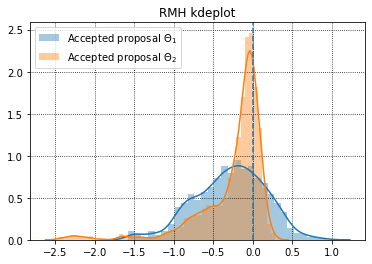

In [7]:
#TODO: add label 
#sns.kdeplot(x_accepted_RW, label = 'Accepted proposal $\Theta$$_1$')
#sns.kdeplot(y_accepted_RW, label = 'Accepted proposal $\Theta$$_2$')
sns.distplot(x_accepted_RW, label = 'Accepted proposal $\Theta$$_1$', hist_kws={"linewidth": 5})
sns.distplot(y_accepted_RW, label = 'Accepted proposal $\Theta$$_2$', hist_kws={"linewidth": 5});_=plt.legend(loc ='upper left');


plt.title('RMH kdeplot')
plt.axvline(x=0, linestyle='--')
plt.grid(linestyle =':',color='k')

# plt.savefig('/Users/zhouji/Documents/Results/Banana/kde_RMH.png')
plt.savefig('kde_RMH.png')

# Hamiltonian Monte Carlo (HMC)

<div class="alert alert-info">

$$ H(\boldsymbol{\theta}, \mathbf{p})=-\log \pi(\boldsymbol{\theta} | \mathcal{D})+\frac{1}{2} \log \operatorname{det} \mathbf{G}(\boldsymbol{\theta})+\frac{1}{2} \mathbf{p}^{\top} \mathbf{G}(\boldsymbol{\theta})^{-1} \mathbf{p}=\phi(\boldsymbol{\theta})+\frac{1}{2} \mathbf{p}^{\top} \mathbf{G}(\boldsymbol{\theta})^{-1} \mathbf{p} $$

<div>

In [8]:
##TODO: naming
accepted,rejected = MC.run_chain('HMC')

/Users/darksky_thasya/opt/anaconda3/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/sample.py:333: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


Acceptance rate: 99.3%


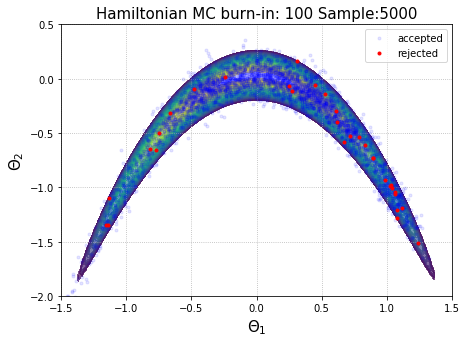

In [9]:
plt.figure(figsize=(7,5))
Bana_dist.draw_post()
x_accepted_HMC = accepted[:,0]
y_accepted_HMC = accepted[:,1]
x_rejected_HMC = rejected[:,0]
y_rejected_HMC = rejected[:,1]

plt.xlim(-1.5,1.5)
plt.ylim(-2,0.5)
plt.xlabel(r"$\Theta$$_1$")
plt.ylabel(r"$\Theta$$_2$")
##TODO: tile
plt.title('Hamiltonian MC burn-in: {} Sample:{}'.format(MC.burnin, MC.num_results),fontsize = 15)
plt.plot(x_accepted_HMC,y_accepted_HMC,'b.',label = 'accepted',alpha = 0.1)
plt.plot(x_rejected_HMC,y_rejected_HMC,'r.',label = 'rejected',alpha = 1)
        
plt.legend(loc = 'upper right')
plt.grid(linestyle = ':')
print('Acceptance rate: %0.1f%%' % (100*(x_accepted_HMC.shape[0]/MC.num_results)))
# plt.savefig('/Users/zhouji/Documents/Results/Banana/Banana_HMC.png')

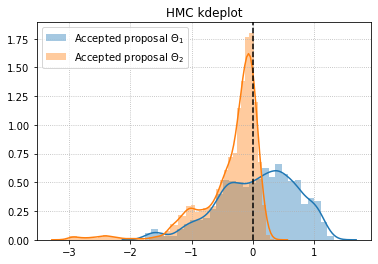

In [10]:
#sns.kdeplot(x_accepted_HMC,label= 'Accepted proposal $\Theta$$_1$')
#sns.kdeplot(y_accepted_HMC,label= 'Accepted proposal $\Theta$$_2$')
sns.distplot(x_accepted_HMC,label= 'Accepted proposal $\Theta$$_1$', hist_kws={"linewidth": 5})
sns.distplot(y_accepted_HMC,label= 'Accepted proposal $\Theta$$_2$', hist_kws={"linewidth": 5});_=plt.legend(loc ='upper left');
# label

plt.title('HMC kdeplot')
plt.grid(linestyle = ':')
plt.axvline(x=0, linestyle='--',color='k')
#plt.savefig('/Users/zhouji/Documents/Results/Banana/kde_HMC.png')


## Generalized Preconditioned Crank-Nicolson with Hessian information

<div class="alert alert-info">

Another Markov Chain Monte Carlo (MCMC) method is **gpCN or Generalized preconditioned Crank-Nicolson** which is a generalized version of the preconditioned Crank-Nicolson (pCN) sampler. The new proposal gpCN is able to incorporate information of the measured interest which derivated from a Gaussian approximation $ \nu $. Throughout the proposal of pCN derivated from the prior Gaussian distribution $ \mu_{\text {prior}} $. The proposes the generalized pCN will have a superior acknowledgement likelihood than pCN, prompting progressively quick testing. The following equation is defined to calculate the acceptance ratio of gpCN: 

$$ a_{\nu}\left(m_{\text {current }}, m_{\text {proposed }}\right):=\min \left\{1, \exp \left(\Delta\left(m_{\text {current }}\right)-\Delta\left(m_{\text {proposed }}\right)\right)\right\} $$

and $ \Delta m$ can be express as:

$$ \Delta(m)= \Phi\left(m, \mathbf{d}_{\mathrm{obs}}\right)+\frac{1}{2}\left\|\mathrm{m}-\mathrm{m}_{\mathrm{prior}}\right\|_{C_{\mathrm{prior}}^{-1}}^{2}-\frac{1}{2}\left\|\mathrm{m}-\mathrm{m}_{\nu}\right\|_{\mathrm{C}_{\nu}^{-1}}^{2} $$
 
</div>

In [11]:
accepted,rejected = MC.run_chain('HessianMC')

Text(0, 0.5, '$\\Theta$$_2$')

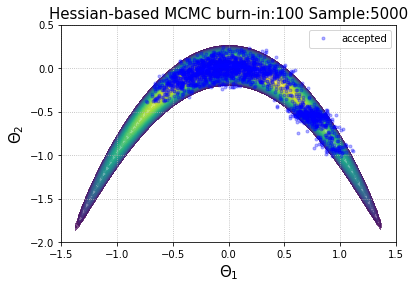

In [12]:
# sns.kdeplot(x_accepted,y_accepted,ax=ax1)
accepted = np.array(accepted)
rejected = np.array(rejected)

plt.title('Hessian-based MCMC burn-in:{} Sample:{}'.format(MC.burnin, MC.num_results),fontsize = 15)
plt.plot(accepted[:,0],accepted[:,1],'b.',label = 'accepted',alpha = 0.3)
#plt.plot(rejected[:,0],rejected[:,1],'r.',label = 'rejected',alpha = 0.3)
plt.legend(loc = 'upper right')
plt.grid(linestyle = ':')

Bana_dist.draw_post()
plt.xlabel("$\Theta$$_1$")
plt.ylabel("$\Theta$$_2$")
# plt.savefig('/Users/zhouji/Documents/Results/Banana/Hessian_MCMC.png')

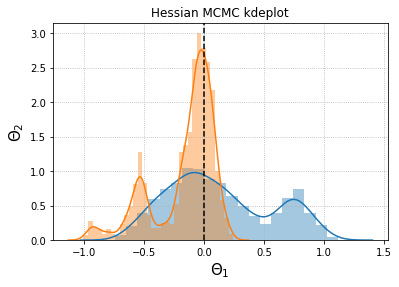

In [13]:
#sns.kdeplot(accepted[:,0])
#sns.kdeplot(accepted[:,1])
sns.distplot(accepted[:,0],hist_kws={"linewidth": 5})
sns.distplot(accepted[:,1],hist_kws={"linewidth": 5})

plt.xlabel("$\Theta$$_1$",fontsize = 15)
plt.ylabel("$\Theta$$_2$",fontsize = 15)
plt.title('Hessian MCMC kdeplot')
plt.axvline(x=0, linestyle='--',color='k')
plt.grid(linestyle=':')
# plt.savefig('/Users/zhouji/Documents/Results/Banana/kde_Hess.png')

# Variational Method

<div class="alert alert-info">
The Variational Method is based on the Theory of Stein. **The Stein variational gradient descent or SVGD** is a new Bayesian inference algortihm. The SVGD seeks a set points to approximate the target distrubution using iterative gradient based updates. It has a simple structure that intently mimics the typical gradient descent for optimization, and in certainity reduces to the typical gradient descent for advancement when using only one particle.
    
$$ x_{i} \leftarrow x_{i}+\epsilon \hat{\mathbb{E}}_{x \sim\left\{x_{i}\right\}_{i=1}^{n}}\left[\nabla_{x} \log p(x) k\left(x, x_{i}\right)+\nabla_{x} k\left(x, x_{i}\right)\right], \quad \forall i=1, \ldots, n, $$

where:

$\hat{\mathbb{E}}_{x \sim\left\{x_{i}\right\}_{i=1}^{n}}$ denotes empirical averaging over $\left\{x_{i}\right\}$, that is, $\hat{\mathbb{E}}_{x \sim\left\{x_{i}\right\}_{i=1}^{n}}[f(x)]=\sum_{i} f\left(x_{i}\right) / n$.

</div>

In [ ]:
vi = VI(Bana_dist)
result = vi.run_inference()

In [ ]:
vi.plot()
plt.xticks([])
plt.yticks([])

## Make animation

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
from SVGD import svgd_kernel,gradient

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_xlim(( -3, 3))
ax.set_ylim((-3, 3))

num_particles = 250
num_latent = 2
num_iter = 10000
range_limit = [-3, 3]
npoints_plot = 50

z_np = tf.convert_to_tensor(-np.random.randn(num_particles, num_latent)*2.0,dtype = tf.float32)
particels, = ax.plot(z_np[:,0], z_np[:,1],'o',ms =6,color = 'cornflowerblue')


lr = 0.002

def init():
    particels.set_data([], [])
    return (particels,)


def animate(i):
    global z_np, lr
    log_p_grad = gradient(z_np,Bana_dist.joint_log_post)
    kernel_matrix, kernel_gradients = svgd_kernel(z_np)
    grad_theta = (tf.matmul(kernel_matrix, log_p_grad) + kernel_gradients)/num_particles
    z_np = z_np+lr*grad_theta
    particels.set_data(z_np[:,0], z_np[:,1])

    return (particels,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2500, interval=20, blit=True)

In [ ]:
writer = animation.writers['ffmpeg'](fps=30)

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
writer = animation.writers['ffmpeg'](fps=30)
# anim.save('test.mp4',writer=writer,dpi=100)

## Prior, Likelihood, Posterior

<div class="alert alert-info">
    
</div>

In [1]:
#import library
from scipy.stats import norm
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
%matplotlib inline

from Inference import MCMC,VI
from Banana import Banana_dist

In [2]:
c = 0 # mean of observations
N = 100 # number of observation data
mu =tf.constant([0.,0.],dtype = tf.float32)
cov = tf.eye(2, dtype = tf.float32)
sigma2y = 1 # standard deviation of observation data

## Generate the observation data

### Likelihood

In [3]:
y_ = np.random.normal(loc =c, scale = sigma2y, size = N)
D = tf.convert_to_tensor(y_,dtype = tf.float32)

def likelihood_prob(D,theta1,theta2):
    # define likelihood
    y = tfd.Normal(loc = tf.add(theta2,tf.pow(theta1,2.)), scale = sigma2y)
    return tf.reduce_sum(y.prob(D))

In [4]:
x, y = np.mgrid[-2:2:.1, -2:2:.1]
pos = np.empty(x.shape + (2,), dtype=np.float32)
pos[:, :, 0] = x; pos[:, :, 1] = y
pos = tf.convert_to_tensor(pos)
likelihood = np.empty(x.shape)
for i in range(np.arange(-2, 2, .1).shape[0]):
    for j in range(np.arange(-2, 2, .1).shape[0]):
        likelihood[i][j] = likelihood_prob(D,pos[i][j][0],pos[i][j][1])

In [5]:
likelihood_prob(D, 0.01, 0.04)

<tf.Tensor: shape=(), dtype=float32, numpy=29.648186>

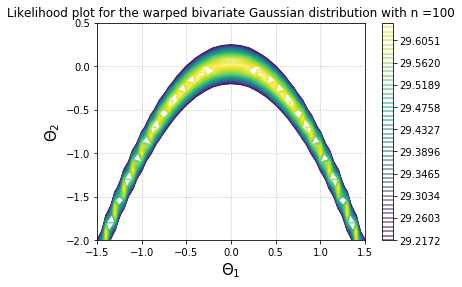

In [6]:
# Draw the curve
levels = np.arange(likelihood_prob(D,-0., -0.2), likelihood_prob(D, 0.01, 0.04), (likelihood_prob(D, 0.01, 0.04) - likelihood_prob(D,-0., -0.2))/50)

plt.contour(x, y, likelihood,levels=levels, alpha=0.7)
plt.grid(linestyle =':')
plt.xlim(-1.5, 1.5)
plt.ylim(-2, 0.5)
plt.xlabel(r"$\Theta$$_1$", fontsize=15)
plt.ylabel(r"$\Theta$$_2$", fontsize=15)
plt.title('Likelihood plot for the warped bivariate Gaussian distribution with n =100')
plt.colorbar()

### Prior

In [ ]:
def draw_post(self, post=None, title=None):
        Min = tf.constant([[-0., -0.2]])
        Max = tf.constant([[0.01, 0.04]])
        levels = np.arange(likelihood_prob(Min), likelihood_prob(
            Max), (likelihood_prob(Max) - likelihood_prob(Min))/50)

        if post is None:
            post = full_post()
        plt.contourf(x, y, likelihood, levels=levels, alpha=0.7)

        if title is not None:
            plt.title(title)
        plt.xlim(-1.5, 1.5)
        plt.ylim(-2, 0.5)
        plt.xlabel("x1", fontsize=15)
        plt.ylabel("x2", fontsize=15)

In [ ]:
y_ = np.random.normal(loc =c, scale = sigma2y, size = N)
D = tf.convert_to_tensor(y_,dtype = tf.float32)

def prior_prob(D,theta1,theta2):
    #define random variables prior
    mvn = tfd.MultivariateNormalTriL(
        loc=mu, 
        scale_tril=tf.linalg.cholesky(cov))
    z = tf.stack([theta1, theta2], axis=-1)
    return(mvn.prob(tf.squeeze(z)))

In [ ]:
x, y = np.mgrid[-2:2:.1, -2:2:.1]
pos = np.empty(x.shape + (2,), dtype=np.float32)
pos[:, :, 0] = x; pos[:, :, 1] = y
pos = tf.convert_to_tensor(pos)
prior = np.empty(x.shape)
for i in range(np.arange(-2, 2, .1).shape[0]):
    for j in range(np.arange(-2, 2, .1).shape[0]):
        prior[i][j] = prior_prob(D,pos[i][j][0],pos[i][j][1])

In [ ]:
levels = np.arange(prior_prob(D,-0., -0.2), prior_prob(D, 0.01, 0.04), (prior_prob(D, 0.01, 0.04) - prior_prob(D,-0., -0.2))/50)

plt.contour(x, y, prior,levels=levels, alpha=0.7)
plt.grid(linestyle =':')
plt.xlim(-1.5, 1.5)
plt.ylim(-2, 0.5)
plt.xlabel(r"$\Theta$$_1$", fontsize=15)
plt.ylabel(r"$\Theta$$_2$", fontsize=15)
plt.title('Prior plot for the warped bivariate Gaussian distribution with n =100')

### Posterior

In [ ]:
y_ = np.random.normal(loc =c, scale = sigma2y, size = N)
D = tf.convert_to_tensor(y_,dtype = tf.float32)

def joint_post_prob(D,theta1,theta2):
    y = tfd.Normal(loc = tf.add(theta2,tf.pow(theta1,2.)), scale = sigma2y)
    mvn = tfd.MultivariateNormalTriL(
        loc=mu, 
        scale_tril=tf.linalg.cholesky(cov))
    z = tf.stack([theta1, theta2], axis=-1)
    return(mvn.prob(tf.squeeze(z))+tf.reduce_sum(y.prob(D)))

In [ ]:
x, y = np.mgrid[-2:2:.03, -2:2:.03]
pos = np.empty(x.shape + (2,), dtype=np.float32)
pos[:, :, 0] = x; pos[:, :, 1] = y
pos = tf.convert_to_tensor(pos)
post = np.empty(x.shape)
for i in range(np.arange(-2, 2, .03).shape[0]):
    for j in range(np.arange(-2, 2, .03).shape[0]):
        post[i][j] = joint_post_prob(D,pos[i][j][0],pos[i][j][1])

In [ ]:
levels = np.arange(joint_post_prob(D,-0., -0.2), joint_post_prob(D, 0.01, 0.04), (joint_post_prob(D, 0.01, 0.04) - joint_post_prob(D,-0., -0.2))/50)

plt.contour(x, y, post,levels=levels, alpha=0.7)
plt.grid(linestyle =':')
plt.xlim(-1.5, 1.5)
plt.ylim(-2, 0.5)
plt.xlabel(r"$\Theta$$_1$", fontsize=15)
plt.ylabel(r"$\Theta$$_2$", fontsize=15)
plt.title('Posterior plot for the warped bivariate Gaussian distribution with n =100')

### Plot the results together

In [ ]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(231) 
ax2 = fig.add_subplot(232) 
ax3 = fig.add_subplot(233)

x, y = np.mgrid[-2:2:.03, -2:2:.03]
levels_likelihood = np.arange(likelihood_prob(D,-0., -0.2), likelihood_prob(D, 0.01, 0.04), (likelihood_prob(D, 0.01, 0.04) - likelihood_prob(D,-0., -0.2))/50)
levels_prior = np.arange(prior_prob(D,-0., -0.2), prior_prob(D, 0.01, 0.04), (prior_prob(D, 0.01, 0.04) - prior_prob(D,-0., -0.2))/50)
levels_joint_post = np.arange(joint_post_prob(D,-0., -0.2), joint_post_prob(D, 0.01, 0.04), (joint_post_prob(D, 0.01, 0.04) - joint_post_prob(D,-0., -0.2))/50)


ax1.set_xlabel(r"$\Theta$$_1$")
ax1.set_ylabel(r"$\Theta$$_2$")
ax1.set_title('Likelihood')
ax1.grid(linestyle =':')
ax1.contour(x, y,likelihood, levels=levels_likelihood)

ax2.set_xlabel(r"$\Theta$$_1$")
ax2.set_ylabel(r"$\Theta$$_2$")
ax2.set_title('Prior')
ax2.grid(linestyle =':')
ax2.contour(x, y, prior, levels=levels_prior)

ax3.set_xlabel(r"$\Theta$$_1$")
ax3.set_ylabel(r"$\Theta$$_2$")
ax3.set_title('Posterior')
ax3.grid(linestyle =':')
ax3.contour(x, y, post,levels=levels_joint_post)

(a) Prior, (b) likelihood and (c) posterior for the warped bivariate Gaussian distribution with n=100 values generated from the likelihood with parameter settings $\sigma_y$,$\sigma$ = 11: as the sample size increases and the prior becomes more diffuse, the posterior becomes less identifiable and the ridge in the posterior becomes stronger 